In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [21]:
def kmeans(X, k, max_iters=100):
    # Randomly choose k points as initial centroids
    centroids = X[:k]

    for _ in range(max_iters):
        # Create empty clusters
        clusters = [[] for _ in range(k)]
        
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_idx = np.argmin(distances)
            clusters[closest_centroid_idx].append(point)

        old_centroids = centroids.copy()

        for i in range(k):
            if clusters[i]:  
                centroids[i] = np.mean(clusters[i], axis=0)

        if np.all(centroids == old_centroids):
            break

    return clusters, centroids

In [22]:
# def load_iris_data(path ,target):
#     df = pd.read_csv(path)
#     X = df.drop(target, axis=1).values
#     # return X

In [29]:
def plot_clusters(clusters, centroids):
    colors = ['r', 'g', 'b', 'c', 'm']
    for idx, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:,0], cluster[:,1], s=50, c=colors[idx], label=f'Cluster {idx+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Centroids')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.show()

In [30]:
X = load_iris().data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Final Centroids:
 [[6.9125     3.1        5.846875   2.13125   ]
 [6.23658537 2.85853659 4.80731707 1.62195122]
 [5.02173913 3.44782609 1.4673913  0.25      ]
 [5.52962963 2.62222222 3.94074074 1.21851852]]


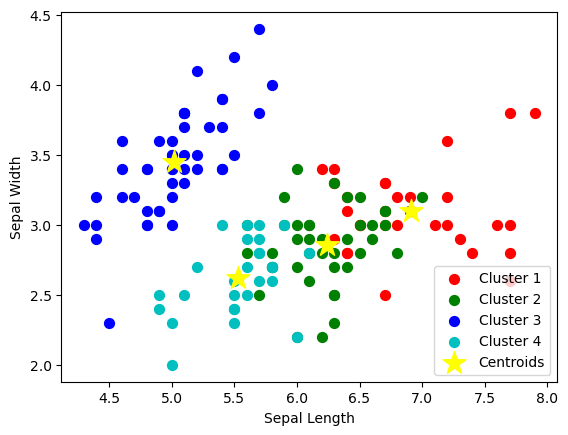

In [31]:
k = 4  
clusters, centroids = kmeans(X, k)

print("Final Centroids:\n", centroids)
    
    
plot_clusters(clusters, centroids)